# **Multithreading in Python**



[Multithreading](https://en.wikipedia.org/wiki/Multithreading_(computer_architecture)) enables CPUs to run different parts(threads) of a process concurrently. But what does that mean? Processes can be divided into different parts; let’s take the example of an online multiplayer game. One thread of the game could be responsible for communicating with the servers and rendering the graphics. The communication thread requires minimal computation and would involve some wait time, on the other hand, the render thread is computationally intensive with minimal wait time. Multithreading enables the CPU to run the render thread while the communication thread is waiting for a response from the server, increasing the CPU utilisation. 

The `threading` module comes with the standard Python library, so there’s no need for installing anything. By default, your Python programs have a single thread, called the main thread. You can create threads by passing a function to the `Thread()` constructor or by inheriting the Thread class and overriding the `run()` method.

## **Using the Thread() Constructor**

In [1]:
import threading
import time

def useless_function(seconds):
    print(f'Waiting for {seconds} second(s)', end = "\n")
    time.sleep(seconds)
    print(f'Done Waiting {seconds}  second(s)')

start = time.perf_counter()
t = threading.Thread(target=useless_function, args=[1])
t.start()
print(f'Active Threads: {threading.active_count()}')
t.join()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') 

Waiting for 1 second(s)
Active Threads: 6
Done Waiting 1  second(s)
Finished in 1.0 second(s)


The two active threads are the main thread and the useless_function thread that you just created. The `join()` method blocks the execution flow until the thread `t` terminates. If you were to remove the `join()` call, the main thread would finish before `t`, and the output would be something like.


```
-----------------------------Output-----------------------------
 Waiting for 1 second(s)
 Active Threads: 2
 Finished in 0.0 second(s) ```



Although the `active_count()` method is called after starting the thread t, it finishes execution before it. This happens because the processor runs the main thread while the thread `t` is sleeping. If you were to add a delay of 1 second before it, it would be executed after the thread t terminates. 

In [2]:
t = threading.Thread(target=useless_function, args=[1])
start = time.perf_counter()
t.start()
time.sleep(1)
print(f'Active Threads: {threading.active_count()}')
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') 

Waiting for 1 second(s)
Done Waiting 1  second(s)
Active Threads: 5
Finished in 1.0 second(s)


## **Creating Your Thread Class**

The Thread subclass should only override the `run()` method and the `__init__()` constructor. And if the constructor is overridden the base class constructor, Thread.`__init__(self)`, should be invoked before doing anything else.

In [3]:
from threading import Thread

def countdown(name, delay, count):
    while count:
        time.sleep(delay)
        print (f'{name, time.ctime(time.time()), count}')
        count -= 1

class newThread(Thread):
    def __init__(self, name, count):
        threading.Thread.__init__(self)
        self.name = name
        self.count = count
    def run(self):
        print("Starting: " + self.name + "\n")
        countdown(self.name, 1,self.count)
        print("Exiting: " + self.name + "\n")

t = newThread("Thread 1", 5)
t.start()
t.join()
print("Exiting Main Thread") 

Starting: Thread 1

('Thread 1', 'Fri Oct 29 12:46:23 2021', 5)
('Thread 1', 'Fri Oct 29 12:46:24 2021', 4)
('Thread 1', 'Fri Oct 29 12:46:25 2021', 3)
('Thread 1', 'Fri Oct 29 12:46:26 2021', 2)
('Thread 1', 'Fri Oct 29 12:46:27 2021', 1)
Exiting: Thread 1

Exiting Main Thread


Let’s illustrate the concurrency aspect of multithreading and the increased CPU utilization with the help of an example

### Unoptimized Code

In [4]:
import requests
import time

urls = [
    'https://images.pexels.com/photos/305821/pexels-photo-305821.jpeg',
    'https://images.pexels.com/photos/509922/pexels-photo-509922.jpeg',
    'https://images.pexels.com/photos/325812/pexels-photo-325812.jpeg',
    'https://images.pexels.com/photos/1252814/pexels-photo-1252814.jpeg',
    'https://images.pexels.com/photos/1420709/pexels-photo-1420709.jpeg',
    'https://images.pexels.com/photos/963486/pexels-photo-963486.jpeg',
    'https://images.pexels.com/photos/1557183/pexels-photo-1557183.jpeg',
    'https://images.pexels.com/photos/3023211/pexels-photo-3023211.jpeg',
    'https://images.pexels.com/photos/1031641/pexels-photo-1031641.jpeg',
    'https://images.pexels.com/photos/439227/pexels-photo-439227.jpeg',
    'https://images.pexels.com/photos/696644/pexels-photo-696644.jpeg',
    'https://images.pexels.com/photos/911254/pexels-photo-911254.jpeg',
    'https://images.pexels.com/photos/1001990/pexels-photo-1001990.jpeg',
    'https://images.pexels.com/photos/3518623/pexels-photo-3518623.jpeg',
    'https://images.pexels.com/photos/916044/pexels-photo-916044.jpeg'
]

def download(url):
    img_data = requests.get(url).content
    img_name = url.split('/')[4]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_data)
        print(f'downloading {img_name}')

#Please try this in your local

# t1 = time.perf_counter()
# for i in urls:
#     download(i)
# t2 = time.perf_counter()
# print(f'Finished in {t2-t1} seconds') 

downloading 305821.jpg
downloading 509922.jpg
downloading 325812.jpg
downloading 1252814.jpg
downloading 1420709.jpg
downloading 963486.jpg
downloading 1557183.jpg
downloading 3023211.jpg
downloading 1031641.jpg
downloading 439227.jpg
downloading 696644.jpg
downloading 911254.jpg
downloading 1001990.jpg
downloading 3518623.jpg
downloading 916044.jpg
Finished in 66.59841720199984 seconds


### Multithreaded Code

In [5]:
#Please try this in your local

# start = time.perf_counter()
# threads = []
# for i in urls:
#     t = threading.Thread(target=download, args=[i])
#     t.start()
#     threads.append(t)
# for thread in threads:
#     thread.join()
# finish = time.perf_counter()
# print(f'Finished in {round(finish-start, 2)} seconds') 

downloading 696644.jpg
downloading 509922.jpg
downloading 305821.jpg
downloading 3023211.jpg
downloading 963486.jpg
downloading 325812.jpg
downloading 1557183.jpgdownloading 1420709.jpg

downloading 911254.jpg
downloading 1001990.jpg
downloading 1252814.jpg
downloading 916044.jpg
downloading 1031641.jpg
downloading 3518623.jpg
downloading 439227.jpg
Finished in 41.92 seconds


The two loops can be replaced with [Executor](https://docs.python.org/3/library/concurrent.futures.html#executor-objects) object from [concurrent.futures](https://docs.python.org/3/library/concurrent.futures.html#module-concurrent.futures):

In [ ]:
#Please try this in your local

In [6]:
# import concurrent.futures
# start = time.perf_counter()
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     executor.map(download, urls)
# finish = time.perf_counter()
# print(f'Finished in {round(finish-start, 2)} seconds') 

downloading 509922.jpg
downloading 963486.jpg
downloading 305821.jpg
downloading 3023211.jpg
downloading 696644.jpg
downloading 911254.jpg
downloading 325812.jpg
downloading 1557183.jpg
downloading 1031641.jpg
downloading 1252814.jpg
downloading 1420709.jpg
downloading 1001990.jpg
downloading 916044.jpg
downloading 3518623.jpg
downloading 439227.jpg
Finished in 39.14 seconds


The `Executor` object creates a thread for each function call and blocks the main thread’s execution until each of these threads is terminated.

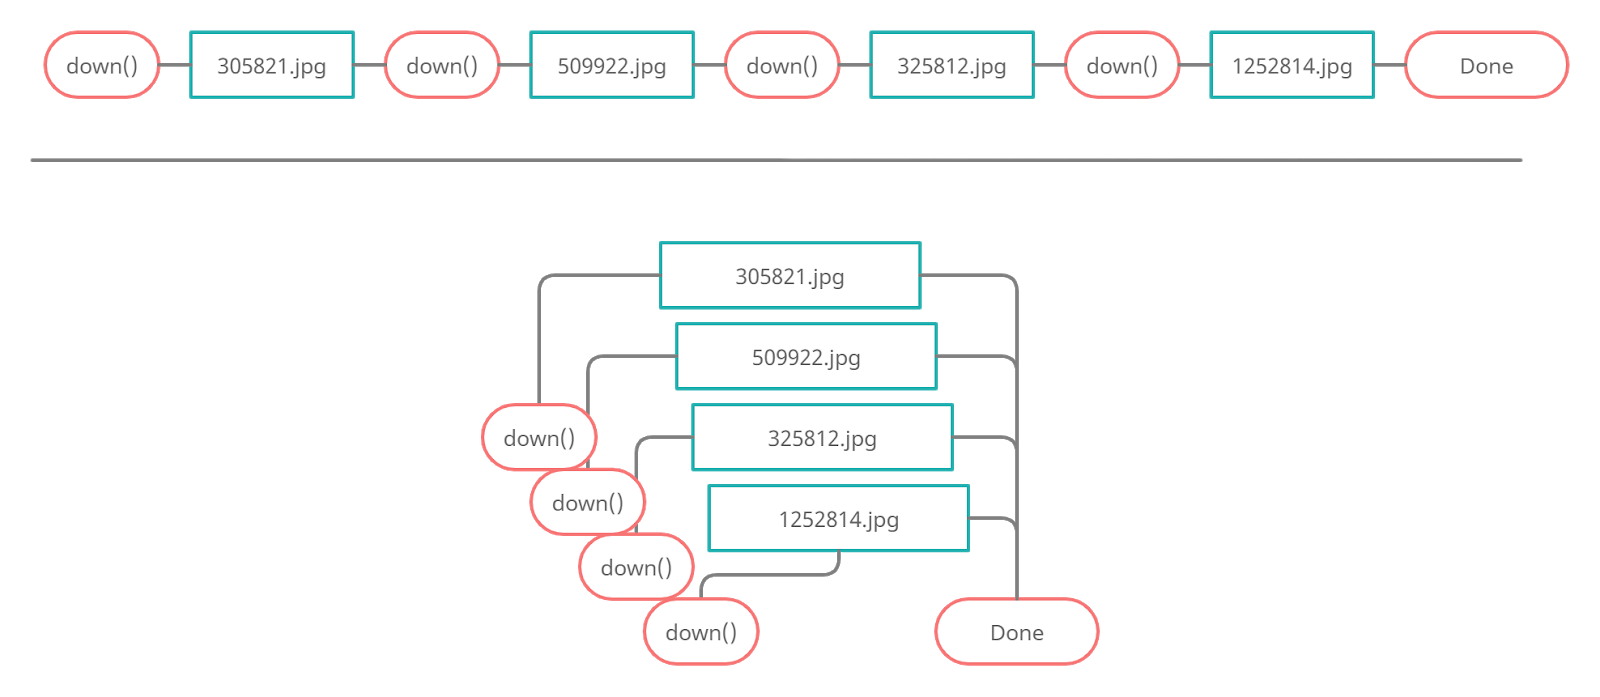

In the unoptimized code, the GET requests happen sequentially, and the CPU is ideal between the requests. When each GET request happens in its separate thread, all of them are executed concurrently, and the CPU alternates between them instead of being ideal. 

Read more about it, [here](https://analyticsindiamag.com/how-to-run-python-code-concurrently-using-multithreading/).